<a href="https://colab.research.google.com/github/VoLinhTruc/Google-Colab-Learning/blob/main/Complete_number_recognization_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
tensorflow.__version__

'2.8.2'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Text(0.5, 1.0, 'Class: 0')

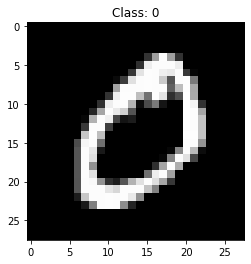

In [14]:
plt.imshow(X_train[1], cmap = "gray")
plt.title("Class: " + str(y_train[1]))

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])

In [18]:
X_train.shape

(60000, 784)

In [20]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [21]:
y_train.shape


(60000,)

In [22]:
X_test.shape

(10000, 28, 28)

In [25]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [26]:
X_test.shape

(10000, 784)

In [27]:
X_test[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 116, 125, 171, 255, 255, 150,  93,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 169, 253, 253, 253, 253, 253, 253, 218,  30,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 169, 253, 253, 253, 213, 142, 176, 253,
       253, 122,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  52, 250, 253, 210,  32,  1

In [28]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [30]:
X_train[2]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [32]:
X_train.max()

255.0

In [33]:
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [35]:
X_train[0].max()

1.0

In [36]:
X_test.min()

0.0

In [44]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [45]:
y_train = np_utils.to_categorical(y_train)

In [46]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [47]:
y_test = np_utils.to_categorical(y_test)

In [48]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [53]:
network = Sequential()
network.add(Dense(input_shape = (28*28,), units = 397, activation = "relu"))
network.add(Dense(units = 397, activation = "relu"))
network.add(Dense(units = 10, activation = "softmax"))

In [54]:
network.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [56]:
history = network.fit(X_train, y_train, batch_size = 128, epochs = 10)

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0841 - accuracy: 0.9749
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0534 - accuracy: 0.9835
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0376 - accuracy: 0.9879
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0269 - accuracy: 0.9915
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0226 - accuracy: 0.9927
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0175 - accuracy: 0.9941
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0156 - accuracy: 0.9947
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0139 - accuracy: 0.9954
Epoch 9/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0128 - accuracy: 0.9954
Epoch 10/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0139 - accura

In [57]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

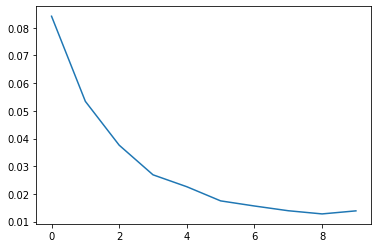

In [58]:
plt.plot(history.history["loss"])

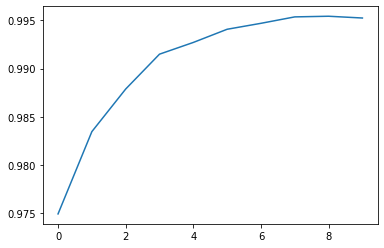

In [59]:
plt.plot(history.history["accuracy"])

In [60]:
accuracy_test = network.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0978 - accuracy: 0.9777


In [61]:
predictions = network.predict(X_test)

Text(0.5, 1.0, 'Class: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]')

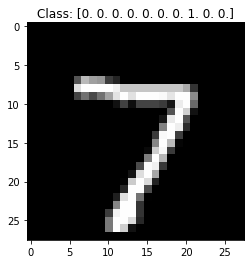

In [65]:
plt.imshow(X_test[0].reshape(28, 28), cmap = "gray")
plt.title("Class: " + str(y_test[0]))

In [63]:
predictions[0]

array([9.1740610e-17, 2.8617744e-10, 5.9582761e-10, 1.8801845e-09,
       1.6582203e-15, 1.9097359e-15, 4.5449730e-17, 1.0000000e+00,
       9.4930487e-13, 1.1747710e-12], dtype=float32)

In [66]:
np.argmax(predictions[0])

7